In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
LANG="en_US.UTF-8"
LANGUAGE="en_US.UTF-8"
LC_ALL="en_US.UTF-8"

sns.set(font='Jetbrains Mono') # Set font


facecolor_reactive_local = [111/255, 178/255, 228/255, .85]
edgecolor_reactive_local = [111/255, 178/255, 228/255, 1.]
label_reactive_local = "Reactive Local Scaling"

facecolor_oracle_local = [150/255, 150/255, 188/255, .85]
edgecolor_oracle_local = [150/255, 150/255, 188/255, 1.]
label_oracle_local = "Oracle Local Scaling"

facecolor_reactive_global = [48/255, 112/255, 173/255, .85]
edgecolor_reactive_global = [48/255, 112/255, 173/255, 1.]
label_reactive_global = "Reactive Global Scaling"

In [55]:
data_folder = 'data/new/'

data_files = ['ls/run', 'gs/run']

target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
steps = [50, 10, 200]
run = 25

findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.


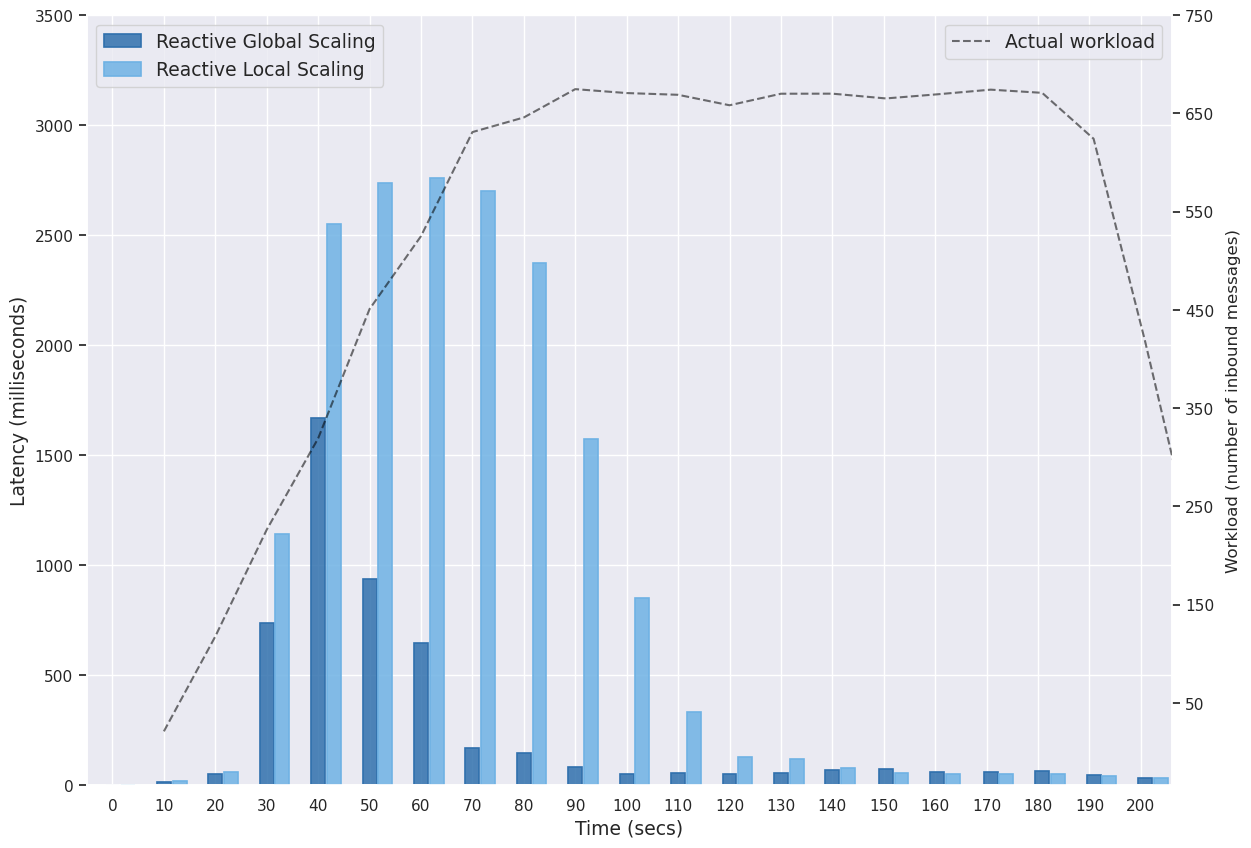

findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.


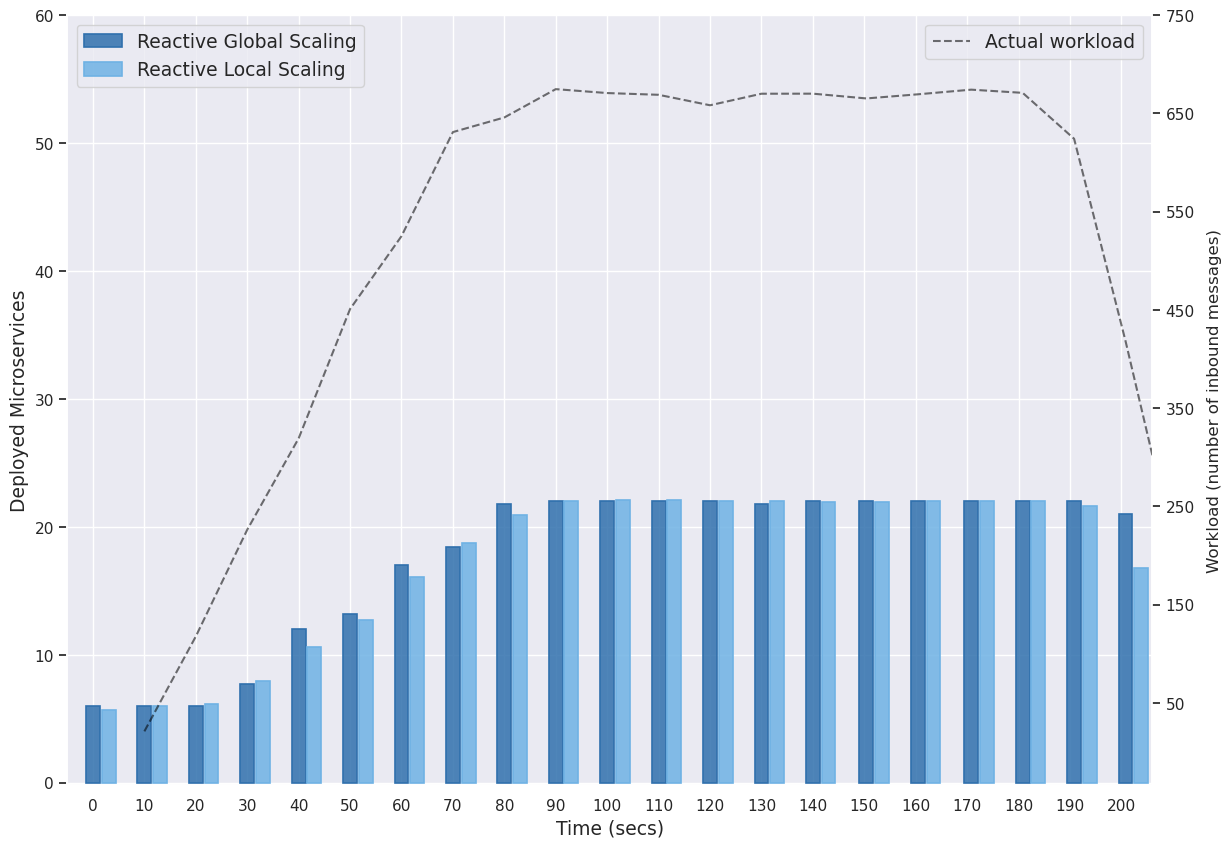

findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.
findfont: Font family 'Jetbrains Mono' not found.


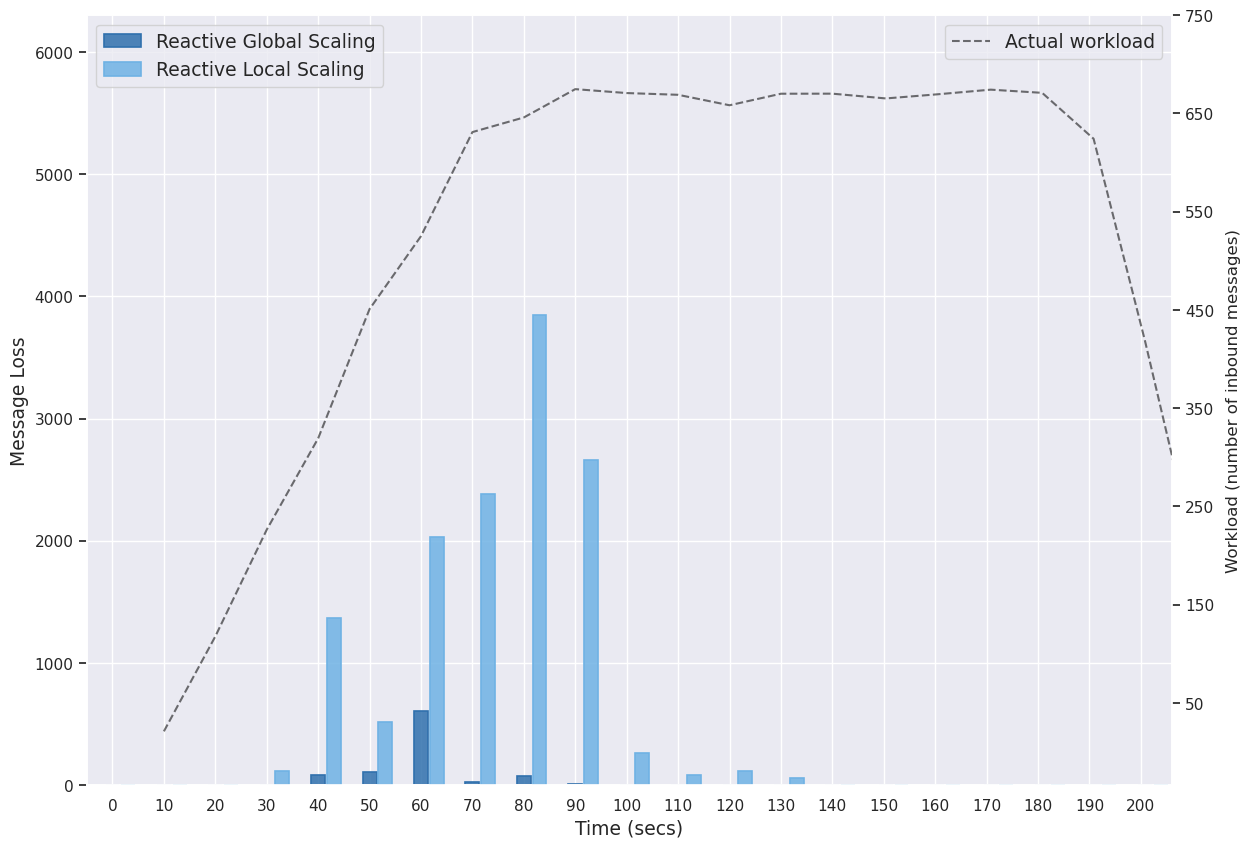

In [57]:
usecols_global = [0,1,3,7,9,13]
usecols_local = [0,1,3,7,9,13]

column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]
dfs = {}

for file in data_files:
    scenario = file.split('/')[0]
    if scenario == 'gs': cols = usecols_global
    else: cols = usecols_local
    dfs[scenario] = []
    for i in range(1, run + 1):
        df = pd.read_csv(
                data_folder+file+str(i)+".txt", 
                sep='\s+',
                usecols=cols,
                names=column_names,
                skiprows=[])
        dfs[scenario] += [df]
        

sum_reactive_global = pd.concat(dfs["gs"]).groupby(level=0).mean()
sum_reactive_local = pd.concat(dfs["ls"]).groupby(level=0).mean()


for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = sum_reactive_global['Time (ms)']
    y_msgs = sum_reactive_global['Measured Workload']
    y_global = sum_reactive_global[target_col]
    y_local = sum_reactive_local[target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 3500
        down = -1
    elif save_label == 'deployed_instaces':
        up = 60
        down = -.2
    else:
        up = 6300
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_reactive_local,
        edgecolor=edgecolor_reactive_local,
        linewidth=1.2,
        label=label_reactive_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./images/local_vs_global/{save_label}_reactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')
    

In [ ]:
for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = sum_reactive_global['Time (ms)']
    y_msgs = sum_reactive_global['Measured Workload']
    y_global = sum_reactive_global[target_col]
    y_local = sum_reactive_local[target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 3500
        down = -1
    elif save_label == 'deployed_instaces':
        up = 60
        down = -.2
    else:
        up = 6300
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_reactive_local,
        edgecolor=edgecolor_reactive_local,
        linewidth=1.2,
        label=label_reactive_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./images/local_vs_global/{save_label}_reactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')